# E-commerce analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Настроим параметры для дальнейших визуализаций
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(40,20)}
        )

In [3]:
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [4]:
#переводим поля датафрейма в нужный тип данных 
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date)

#### Посмотрим, сколько у нас пользователей, которые совершили покупку только один раз

In [5]:
orders_to_customers = orders.merge(customers, on='customer_id')
customer_number_of_orders = orders_to_customers.groupby('customer_unique_id', as_index=False) \
                            .agg({'order_id':'count'}).rename(columns={'order_id':'order_counter'})
customer_number_of_orders[customer_number_of_orders.order_counter==1].shape[0]

93099

#### Сколько заказов в месяц в среднем не доставляется по разным причинам? 

In [66]:
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


In [7]:
#недоставленными заказами будем считать отмененные и недоступные
not_delivered = orders[(orders.order_status == 'canceled') | (orders.order_status == 'unavailable')]

In [8]:
not_delivered.shape

(1234, 8)

In [9]:
not_delivered['month_approve'] =not_delivered.order_approved_at.astype("datetime64[M]")

In [10]:
not_delivered.dropna(inplace=True, subset=['order_approved_at'])

In [11]:
df2 = not_delivered.groupby(['month_approve','order_status'], as_index=False) \
                .agg({'order_id':'count'}) \
                .rename(columns={"order_id":"order_count"})
df2.head()

,month_approve,order_status,order_count
0,2016-10-01,canceled,20
1,2016-10-01,unavailable,6
2,2017-01-01,canceled,2
3,2017-01-01,unavailable,8
4,2017-02-01,canceled,15


In [12]:
df2.groupby('order_status', as_index=False).agg({'order_count':'mean'})

,order_status,order_count
0,canceled,23.047619
1,unavailable,29.000000


Text(0.5, 1.0, 'Количество недоставленных заказов по месяцам')

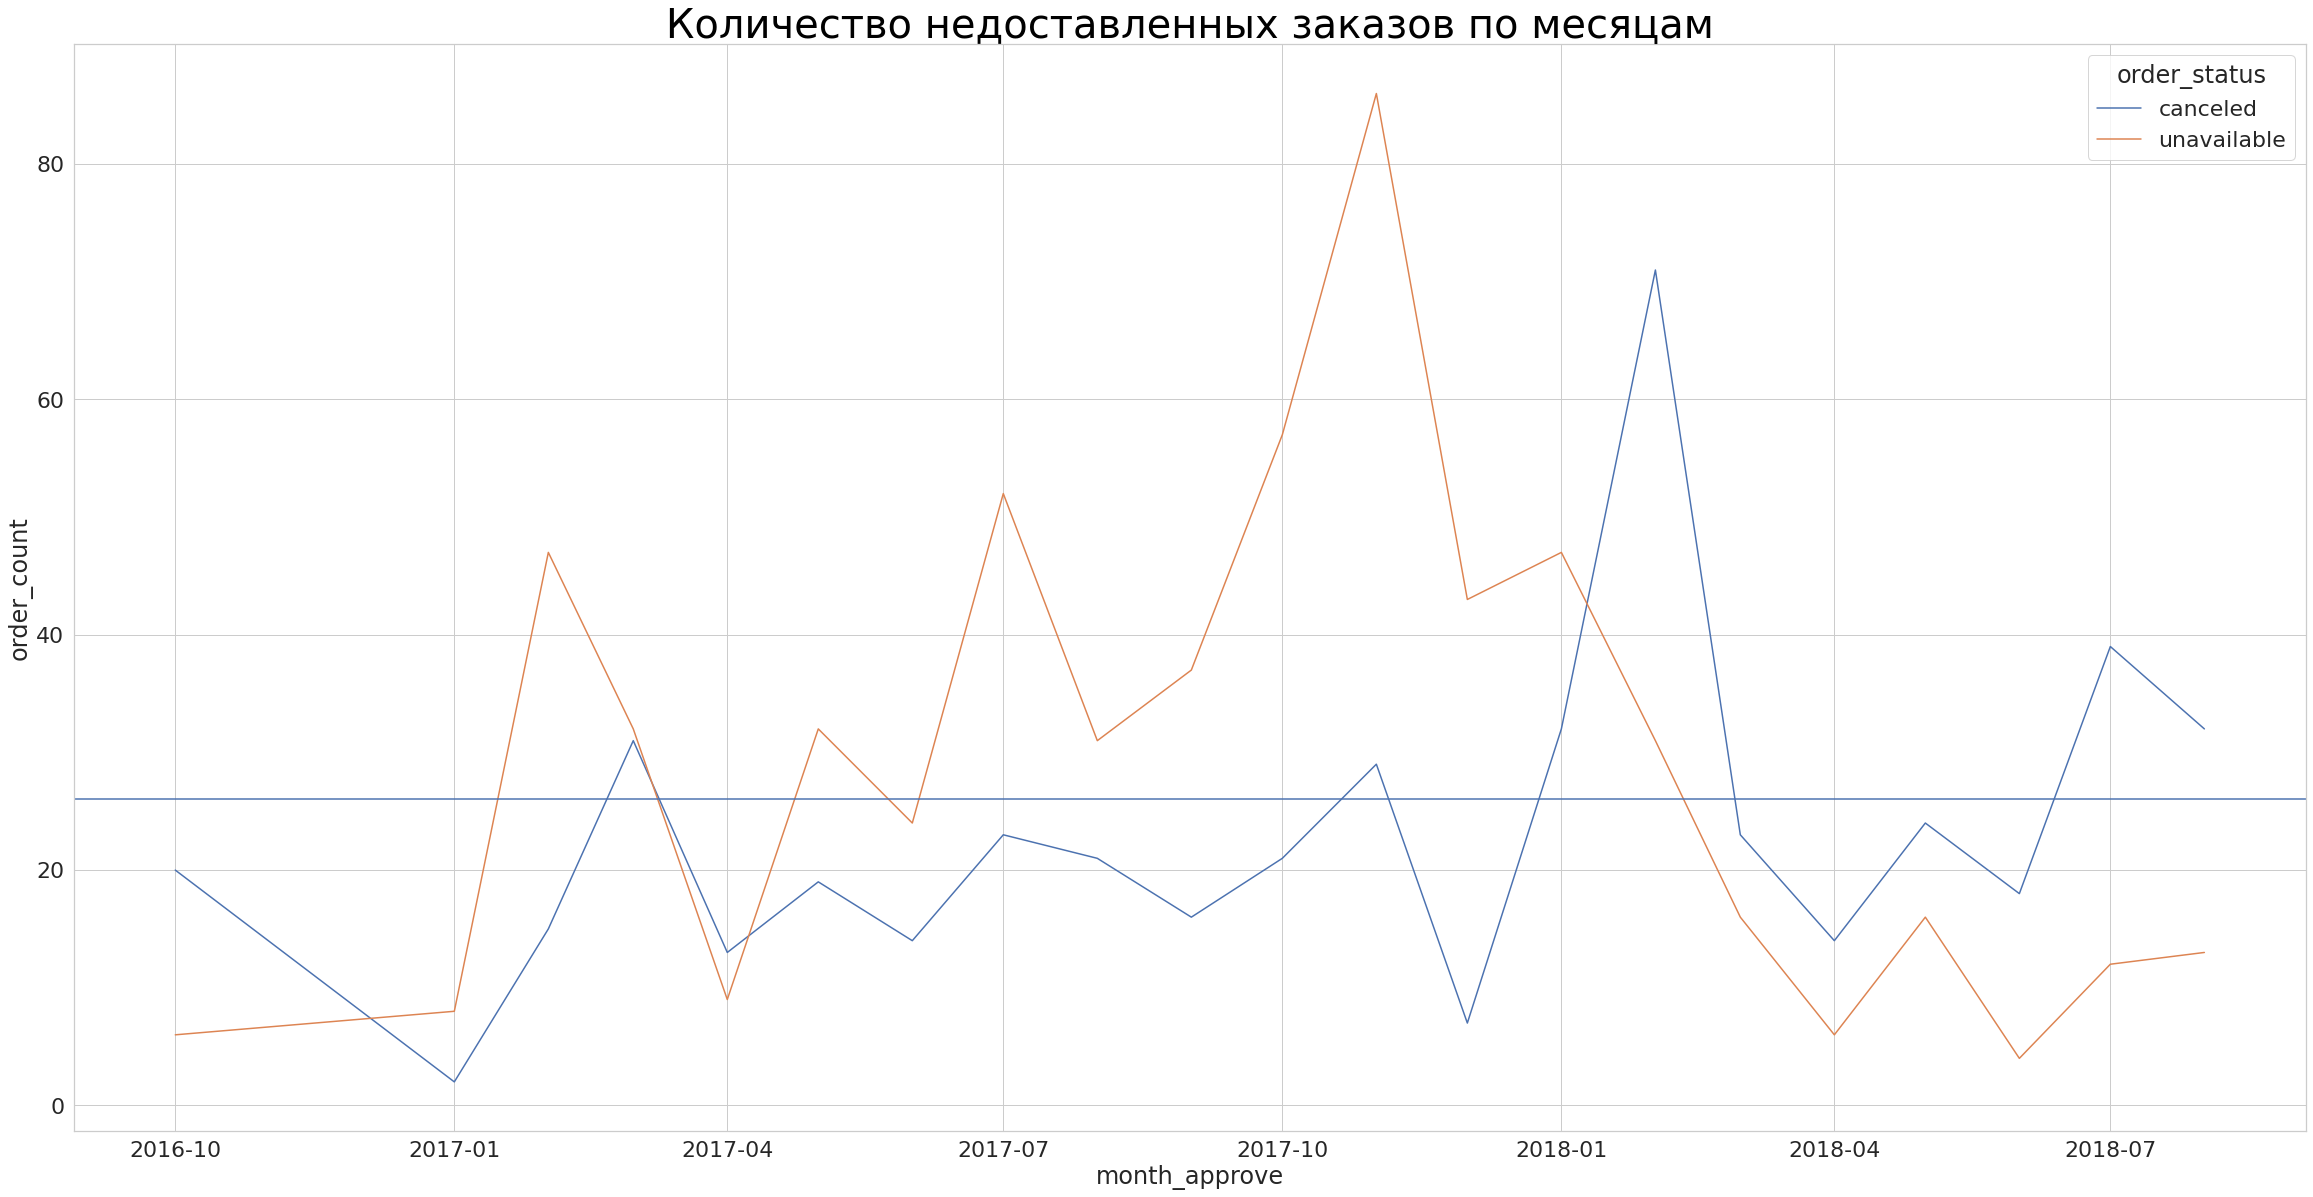

In [13]:
sns.lineplot(data=df2, x='month_approve', y='order_count', hue='order_status')
plt.axhline(y=df2.order_count.mean())

plt.title(label="Количество недоставленных заказов по месяцам",
          fontsize=40,
          color="black")

#### Определим по каждому товару, в какой день недели он чаще всего покупается 

In [14]:
order_items_to_order = order_items.merge(orders, on='order_id')
order_items_to_order['order_purchase_weekday'] = order_items_to_order.order_purchase_timestamp.dt.strftime('%A')
order_items_to_order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday


In [15]:
df3 = order_items_to_order.groupby(['product_id', 'order_purchase_weekday'], as_index=False) \
                            .agg({'order_id':'count'}) \
                            .rename(columns={'order_id':'purchase_amount'})
                            
df3.head()

,product_id,order_purchase_weekday,purchase_amount
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [16]:
max_scores = df3.loc[df3.groupby('product_id')['purchase_amount'].transform(max) == df3['purchase_amount']]
max_scores.head()

,product_id,order_purchase_weekday,purchase_amount
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [17]:
max_scores.purchase_amount.describe()

count    42705.000000
mean         1.597494
std          2.084025
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         93.000000
Name: purchase_amount, dtype: float64

#### Сколько у каждого из пользователей в среднем покупок в неделю? 

In [18]:
orders_to_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [19]:
orders_to_customers['month_of_purchase'] =orders_to_customers.order_purchase_timestamp.astype("datetime64[M]")

In [20]:
import calendar

def days_in_month(data):
    data = pd.to_datetime(data)
    month = data.month
    year = data.year
    days_in_month = calendar.monthrange(year, month)[1]
    return days_in_month

In [21]:
df4= orders_to_customers.groupby(['customer_unique_id', 'month_of_purchase'], as_index=False) \
                    .agg({'order_id':'count'}).rename(columns={'order_id':'purchase_count'})

In [22]:
df4['calendar_wom']=  df4['month_of_purchase'] \
                                        .apply(lambda row: np.round(days_in_month(row)/7, 4))

Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. Учтем это внутри метрики **purchase_ratio**.

In [23]:
df4['purchase_ratio'] = df4.purchase_count / df4.calendar_wom

In [24]:
df4.purchase_ratio.describe()

count    98046.000000
mean         0.233467
std          0.029926
min          0.225805
25%          0.225805
50%          0.225805
75%          0.233334
max          1.354830
Name: purchase_ratio, dtype: float64

Видим, что подавляющее большинство пользователей делает меньше одной покупки в неделю

## Cohort analysis


#### В период с января по декабрь выявим когорту с самым высоким retention на 3-й месяц.

In [25]:
retention_df = orders_to_customers[['customer_unique_id', 'order_purchase_timestamp']]
retention_df.head()

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


In [26]:
#отберем все заказы за 2017 год
retention_df = retention_df[pd.to_datetime(retention_df.order_purchase_timestamp).dt.year == 2017]

In [27]:
retention_df.head()

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 21:57:05
6,36edbb3fb164b1f16485364b6fb04c73,2017-04-11 12:22:08
7,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:10:30


Сделаем колонку **current_month** для дальнейшего выделения когорт

In [28]:
retention_df['current_month'] = pd.to_datetime(retention_df['order_purchase_timestamp']).dt.year.map(str) \
                                 + "-" + pd.to_datetime(retention_df['order_purchase_timestamp']) \
                                 .dt.month.map(str) + "-" '01'


In [29]:
retention_df.current_month = pd.to_datetime(retention_df.current_month)


Для определения когорты каждого пользователя, необходимо знать, когда он совершил первое целевое действие(покупку). запишем эти данные о пользователях в колонку **cohort_month**

In [30]:
retention_df['cohort_month'] = retention_df.groupby('customer_unique_id')['current_month'].transform("min")

Введем индекс когорты как разницу между месяцем, в котором пользователь совершил первое целевое действие и месяцем транзакции

In [31]:
retention_df['cohort_index'] =retention_df.current_month.dt.month - retention_df.cohort_month.dt.month

In [32]:
retention_df.cohort_index.value_counts()

0     44445
1       225
2       119
3        84
4        74
6        50
5        47
7        25
8        20
9         6
10        5
11        1
Name: cohort_index, dtype: int64

In [33]:
cohort_counts = retention_df.groupby(['cohort_month', 'cohort_index'], as_index=False)['customer_unique_id']\
                .nunique() \
                .rename(columns={'customer_unique_id':'users'})

cohort_counts.cohort_month = cohort_counts.cohort_month.apply(lambda row: row.strftime('%Y-%m-%d'))

In [34]:
cohort_counts['retention_rate'] = cohort_counts['users'] / cohort_counts \
                                                    .groupby(["cohort_month"])["users"].transform("max")
cohort_counts

,cohort_month,cohort_index,users,retention_rate
0,2017-01-01,0,765,1.000000
1,2017-01-01,1,3,0.003922
2,2017-01-01,2,2,0.002614
3,2017-01-01,3,1,0.001307
4,2017-01-01,4,3,0.003922
...,...,...,...,...
72,2017-10-01,1,31,0.006935
73,2017-10-01,2,11,0.002461
74,2017-11-01,0,7305,1.000000
75,2017-11-01,1,40,0.005476


Получаем итоговую когортную матрицу

In [35]:
cohorts_pivot = cohort_counts.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'retention_rate')
cohorts_pivot

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01-01,1.0,0.003922,0.002614,0.001307,0.003922,0.001307,0.005229,0.001307,0.001307,NaN,0.003922,0.001307
2017-02-01,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,NaN
2017-03-01,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,NaN,NaN
2017-04-01,1.0,0.005950,0.002125,0.001700,0.003400,0.002550,0.003400,0.002975,0.002975,NaN,NaN,NaN
2017-05-01,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,NaN,NaN,NaN,NaN,NaN
2017-07-01,1.0,0.005135,0.003594,0.002567,0.002824,0.002054,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1.0,0.006931,0.003346,0.002629,0.003585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1.0,0.006778,0.005326,0.002905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
ur_style = (cohorts_pivot
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,,0.39%,0.13%
2017-02-01,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,
2017-03-01,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,,
2017-04-01,100.00%,0.59%,0.21%,0.17%,0.34%,0.25%,0.34%,0.30%,0.30%,,,
2017-05-01,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,,,,
2017-06-01,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,,,,,
2017-07-01,100.00%,0.51%,0.36%,0.26%,0.28%,0.21%,,,,,,
2017-08-01,100.00%,0.69%,0.33%,0.26%,0.36%,,,,,,,
2017-09-01,100.00%,0.68%,0.53%,0.29%,,,,,,,,


## RFM-Analysis

R - время от последней покупки пользователя до текущей даты

F - суммарное количество покупок у пользователя за всё время

M - сумма покупок за всё время

In [37]:
RFM_df = orders_to_customers[['customer_unique_id', 'order_purchase_timestamp']]

In [38]:
RFM_df['reg_month'] = RFM_df.groupby('customer_unique_id')['order_purchase_timestamp'].transform("min")

In [39]:
RFM_df['last_purchase'] = RFM_df.groupby('customer_unique_id')['order_purchase_timestamp'].transform("max")

In [40]:
RFM_df.head()

,customer_unique_id,order_purchase_timestamp,reg_month,last_purchase
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-09-04 11:26:38,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-24 20:41:37,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:38:49,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:28:06,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02-13 21:18:39,2018-02-13 21:18:39


In [41]:
total_df= order_items_to_order.merge(customers, on='customer_id')
total_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_weekday,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [42]:
df1=total_df.groupby('customer_unique_id', as_index=False).agg({'price':'sum'})
RFM_df = RFM_df.merge(df1, on='customer_unique_id', suffixes=None)
RFM_df

,customer_unique_id,order_purchase_timestamp,reg_month,last_purchase,price
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-09-04 11:26:38,2017-10-02 10:56:33,65.38
1,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38,2017-09-04 11:26:38,2017-10-02 10:56:33,65.38
2,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-24 20:41:37,2018-07-24 20:41:37,118.70
3,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:38:49,2018-08-08 08:38:49,159.90
4,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:28:06,2017-11-18 19:28:06,45.00
...,...,...,...,...,...
98751,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-09 09:54:05,72.00
98752,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-02-06 12:58:58,2018-02-06 12:58:58,174.90
98753,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2017-08-27 14:46:43,2017-08-27 14:46:43,205.99
98754,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-01-08 21:28:27,2018-01-08 21:28:27,359.98


In [43]:
RFM_df['month'] = RFM_df.order_purchase_timestamp.max()
RFM_df['month'] = RFM_df.month.apply(lambda row: pd.to_datetime(row.strftime('%Y-%m-%d')))


In [44]:
RFM_df.dtypes

customer_unique_id                  object
order_purchase_timestamp    datetime64[ns]
reg_month                   datetime64[ns]
last_purchase               datetime64[ns]
price                              float64
month                       datetime64[ns]
dtype: object

In [45]:
RFM_df['recency'] = (RFM_df.month - RFM_df.last_purchase).astype('timedelta64[D]').apply(int)

In [46]:
df_2 = RFM_df.groupby('customer_unique_id', as_index=False).agg({'order_purchase_timestamp':'count'}) \
                    .rename(columns={'order_purchase_timestamp':'frequency'})
df_2

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1
95416,fffea47cd6d3cc0a88bd621562a9d061,1
95417,ffff371b4d645b6ecea244b27531430a,1
95418,ffff5962728ec6157033ef9805bacc48,1


In [51]:
df_2.frequency.value_counts()

1     92431
2      2738
3       202
4        30
5         8
6         6
7         3
17        1
9         1
Name: frequency, dtype: int64

In [52]:
RFM_df = RFM_df.merge(df_2, on='customer_unique_id', how='left')

Переведем **frequency** в шкалу 1-4 для подсчета в RFM-Score

In [53]:
RFM_df['f']= RFM_df.frequency.apply(lambda row: get_f(row))

In [54]:
def get_f(row):
    if row in (1, 2):
        return 1
    elif row in (3, 4):
        return 2
    elif row in (5, 6):
        return 3
    else:
        return 4

Введем метрику **r** - recency

In [55]:
RFM_df['r']=5-(pd.qcut(RFM_df.recency, 4, labels=False) + 1)

In [56]:
RFM_df.frequency.value_counts()

1     92431
2      5476
3       606
4       120
5        40
6        36
7        21
17       17
9         9
Name: frequency, dtype: int64

Введем метрику **m** - monetary

In [57]:
RFM_df['m']=(pd.qcut(RFM_df.price, 4, labels=False) + 1)

Собираем все вместе 

In [58]:
RFM_df['rfm_score'] = (RFM_df.f + RFM_df.r + RFM_df.m)

In [59]:
RFM_df.rfm_score.value_counts()

6     24143
5     18390
7     18329
8     12603
4     12431
3      6351
9      6188
10      247
11       43
12       31
Name: rfm_score, dtype: int64

In [60]:
RFM_df.head()

,customer_unique_id,order_purchase_timestamp,reg_month,last_purchase,price,month,recency,frequency,f,r,m,rfm_score
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-09-04 11:26:38,2017-10-02 10:56:33,65.38,2018-10-16,378,2,1,2,2,5
1,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38,2017-09-04 11:26:38,2017-10-02 10:56:33,65.38,2018-10-16,378,2,1,2,2,5
2,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-24 20:41:37,2018-07-24 20:41:37,118.70,2018-10-16,83,1,1,4,3,8
3,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:38:49,2018-08-08 08:38:49,159.90,2018-10-16,68,1,1,4,3,8
4,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:28:06,2017-11-18 19:28:06,45.00,2018-10-16,331,1,1,2,1,4


Введем категории для лучшего восприятия результатов анализа

In [61]:
def rfm_level(df):
    if df['rfm_score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['rfm_score'] >= 8) and (df['rfm_score'] < 9)):
        return 'Champions'
    elif ((df['rfm_score'] >= 7) and (df['rfm_score'] < 8)):
        return 'Loyal'
    elif ((df['rfm_score'] >= 6) and (df['rfm_score'] < 7)):
        return 'Potential'
    elif ((df['rfm_score'] >= 5) and (df['rfm_score'] < 6)):
        return 'Promising'
    elif ((df['rfm_score'] >= 4) and (df['rfm_score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [62]:
RFM_df['segment'] = RFM_df.apply(rfm_level,axis=1)

In [63]:
RFM_df

,customer_unique_id,order_purchase_timestamp,reg_month,last_purchase,price,month,recency,frequency,f,r,m,rfm_score,segment
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-09-04 11:26:38,2017-10-02 10:56:33,65.38,2018-10-16,378,2,1,2,2,5,Promising
1,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38,2017-09-04 11:26:38,2017-10-02 10:56:33,65.38,2018-10-16,378,2,1,2,2,5,Promising
2,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-24 20:41:37,2018-07-24 20:41:37,118.70,2018-10-16,83,1,1,4,3,8,Champions
3,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:38:49,2018-08-08 08:38:49,159.90,2018-10-16,68,1,1,4,3,8,Champions
4,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:28:06,2017-11-18 19:28:06,45.00,2018-10-16,331,1,1,2,1,4,Needs Attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98751,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-09 09:54:05,72.00,2018-10-16,585,1,1,1,2,4,Needs Attention
98752,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-02-06 12:58:58,2018-02-06 12:58:58,174.90,2018-10-16,251,1,1,3,4,8,Champions
98753,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2017-08-27 14:46:43,2017-08-27 14:46:43,205.99,2018-10-16,414,1,1,1,4,6,Potential
98754,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-01-08 21:28:27,2018-01-08 21:28:27,359.98,2018-10-16,280,1,1,2,4,7,Loyal


In [69]:
RFM_vis = RFM_df.groupby('segment', as_index=False).agg({'customer_unique_id':'count'}) \
                                        .rename(columns={'customer_unique_id':'amount'})
RFM_vis['segment_share'] = RFM_vis.amount / sum(RFM_vis.amount)

In [77]:
RFM_vis

,segment,amount,segment_share
0,Can't Loose Them,6509,0.065910
1,Champions,12603,0.127618
2,Loyal,18329,0.185599
3,Needs Attention,12431,0.125876
4,Potential,24143,0.244471
5,Promising,18390,0.186217
6,Require Activation,6351,0.064310


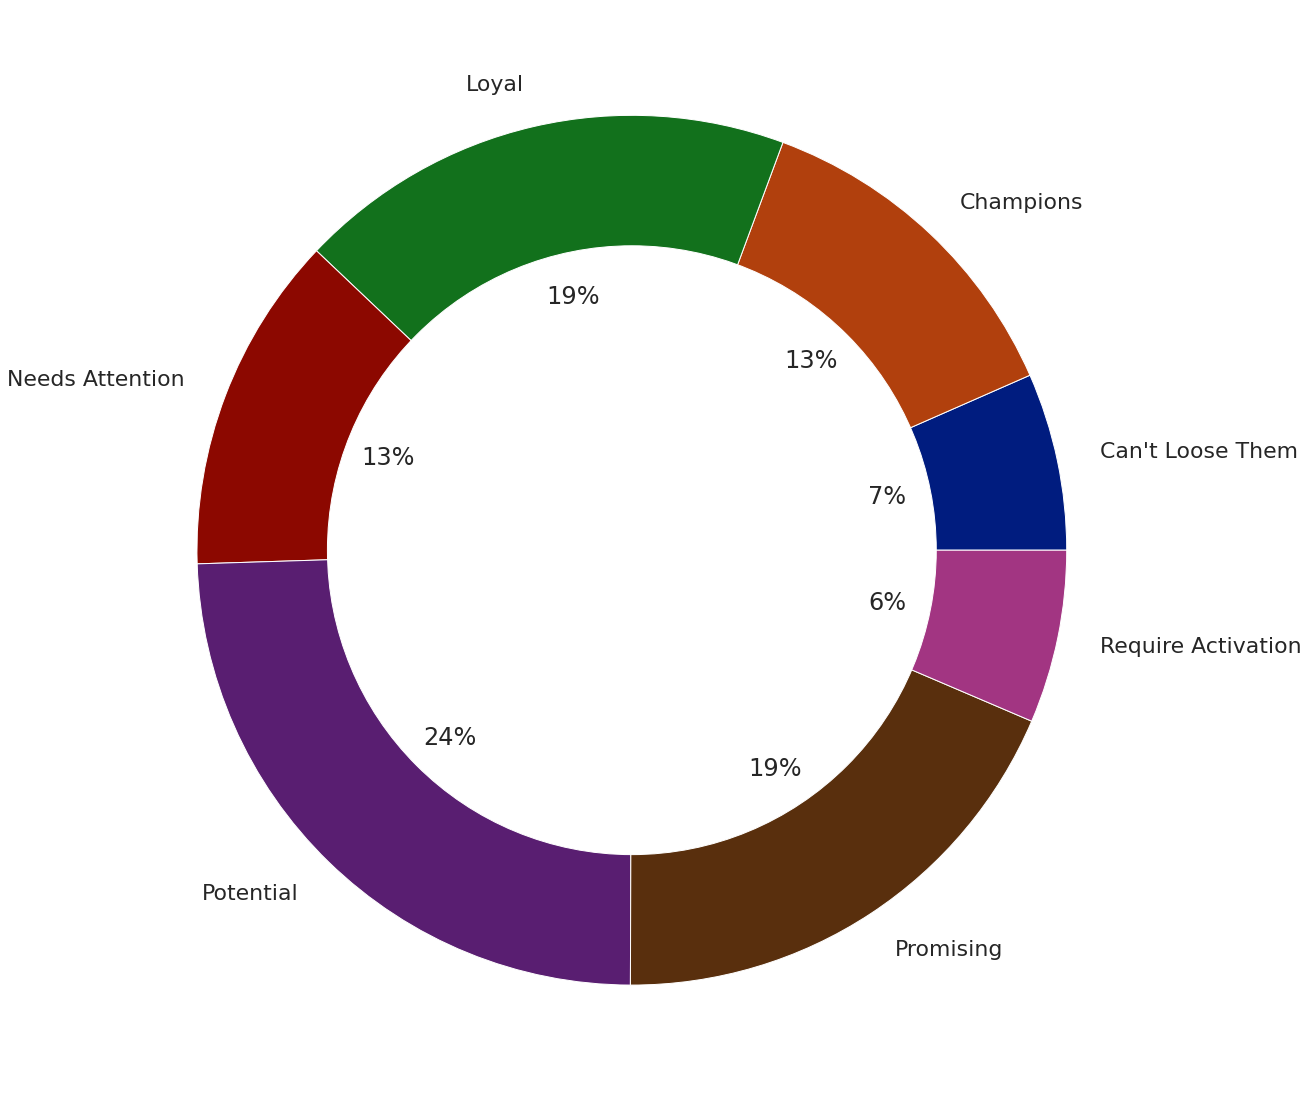

In [85]:
plt.pie(RFM_vis.amount, labels=RFM_vis.segment, colors=sns.color_palette('dark'), autopct='%.0f%%') 
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()